In [ ]:
# Copyright © 2025 UChicago Argonne, LLC All right reserved
# Full license accessible at https://github.com/AdvancedPhotonSource/DONUT/blob/main/LICENSE

import os
import torch
import numpy as np
import pandas as pd
from math import *

import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import cmcrameri.cm as cmc

%matplotlib inline
plt.style.use('/home/beams/B313762/stylesheet.mplstyle')

import sys
sys.path.append('..')
from sim_SIO_gpu import ImageGenerator

## Coordinate system calculation

In [2]:
forward_model = ImageGenerator(4)
det_Qx = forward_model.det_Qx
det_Qy = forward_model.det_Qy
det_Qz = forward_model.det_Qz

[]

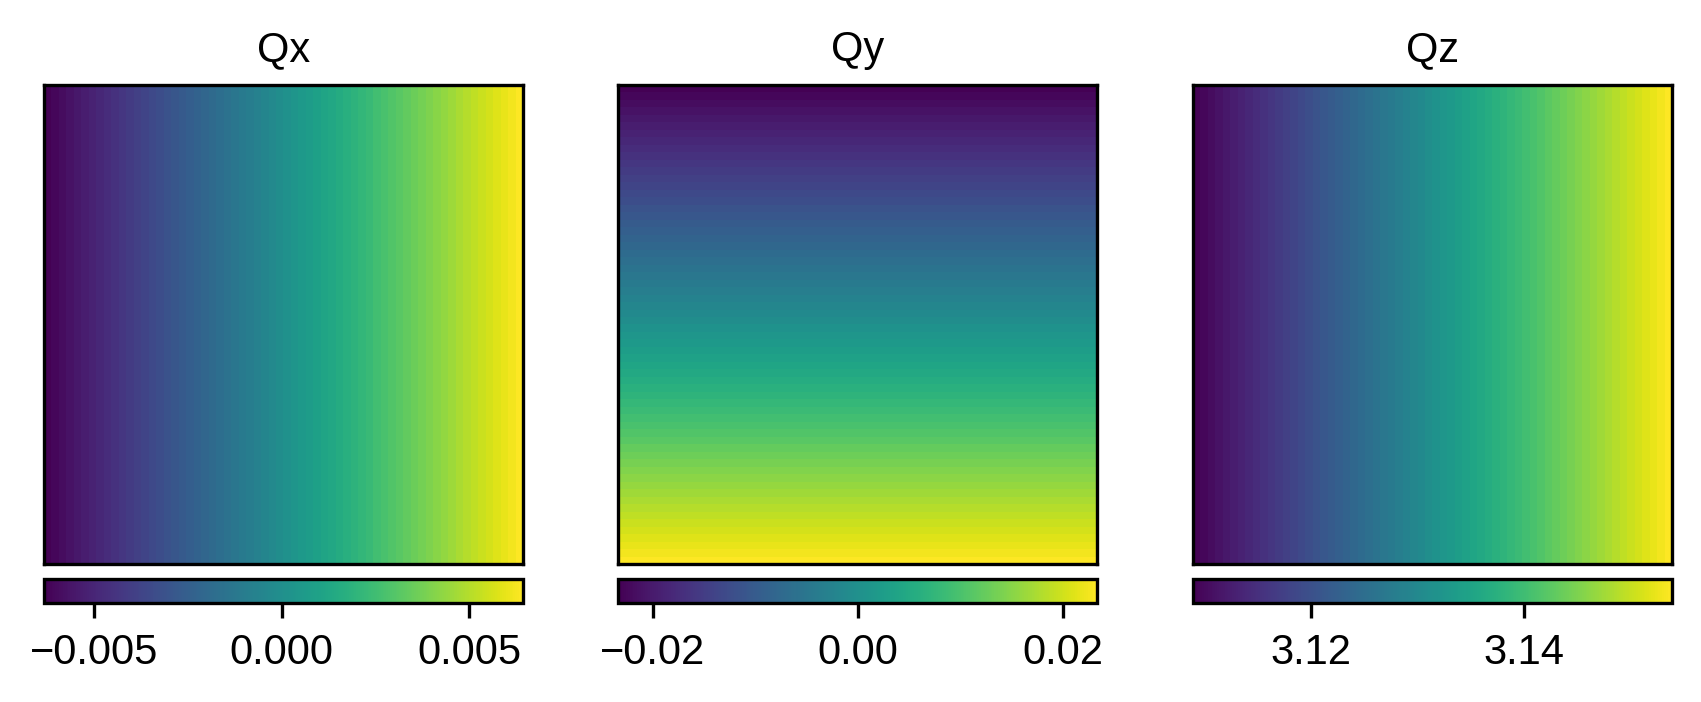

In [3]:
f, ax = plt.subplots(figsize=(7, 2.5), ncols=3)

qx = ax[0].imshow(det_Qx, interpolation='none')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
f.colorbar(qx, cax=cax, orientation='horizontal')
ax[0].set_title('Qx')
ax[0].set_xticks([])
ax[0].set_yticks([])

qy = ax[1].imshow(det_Qy, interpolation='none')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
f.colorbar(qy, cax=cax, orientation='horizontal')
ax[1].set_title('Qy')
ax[1].set_xticks([])
ax[1].set_yticks([])

qz = ax[2].imshow(det_Qz, interpolation='none')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
f.colorbar(qz, cax=cax, orientation='horizontal')
ax[2].set_title('Qz')
ax[2].set_xticks([])
ax[2].set_yticks([])

In [4]:
data_folder = '/data/aileen/DONUT_data'
data = np.load(os.path.join(data_folder, 'dataSIO.npy')).astype(np.float32)

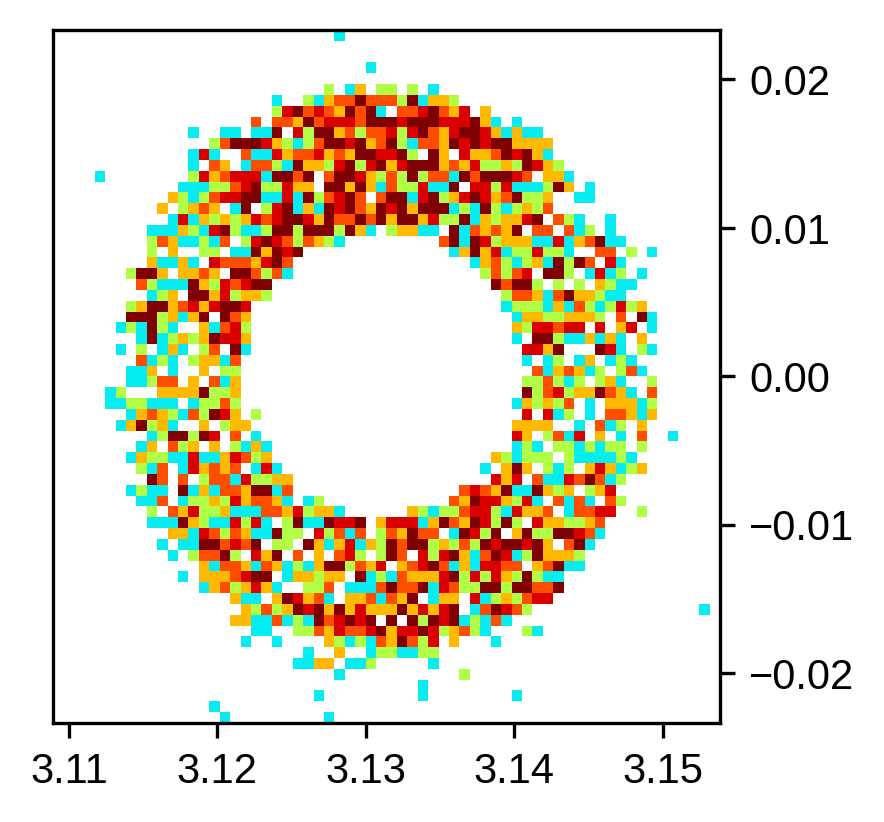

In [ ]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 'truetype'

f, ax = plt.subplots(figsize=(3, 3))

ax.imshow(data[12385], interpolation='none', norm=colors.LogNorm(1, 7), cmap='jet', extent=(det_Qz.min(), det_Qz.max(), det_Qy.min(), det_Qy.max()))
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# f.savefig('figs1a.svg', dpi=300, bbox_inches='tight', transparent=True)

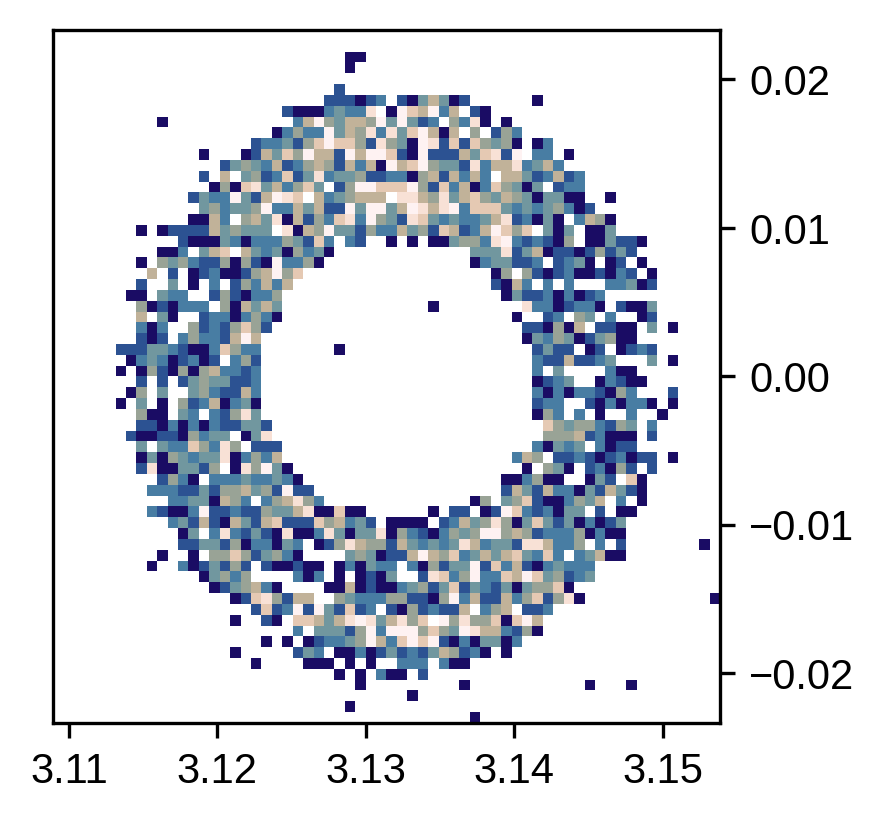

In [ ]:
matplotlib.rcParams['pdf.fonttype'] = 'truetype'

f, ax = plt.subplots(figsize=(3, 3))

ax.imshow(data[98*165+104], interpolation='none', norm=colors.LogNorm(vmax=10), cmap=cmc.lapaz, extent=(det_Qz.min(), det_Qz.max(), det_Qy.min(), det_Qy.max()))
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

#f.savefig('figs4c.svg', dpi=300, bbox_inches='tight', transparent=True)

## Thickness comparison

In [7]:
# Low thickness (similar to experimentally measured film)
data_folder = '/data/aileen/DONUT_data'

thin = np.load(os.path.join(data_folder, 'sim_SIO_4nm_range.npy'))

thin[np.isnan(thin)] = 0
thin /= thin.sum(axis=(4, 5), keepdims=True)

avg_max = np.mean(thin.max(axis=(4, 5)))

t97 = thin[0, 10, 10, 10] # Strain, tilt_lr, and tilt_ud are 0
t137 = thin[10, 10, 10, 10]

t97 = (t97 / avg_max) * 6
t137 = (t137 / avg_max) * 6

rng = np.random.default_rng()
t97 = rng.poisson(t97)
t137 = rng.poisson(t137)

In [10]:
import matplotlib.cm as cm

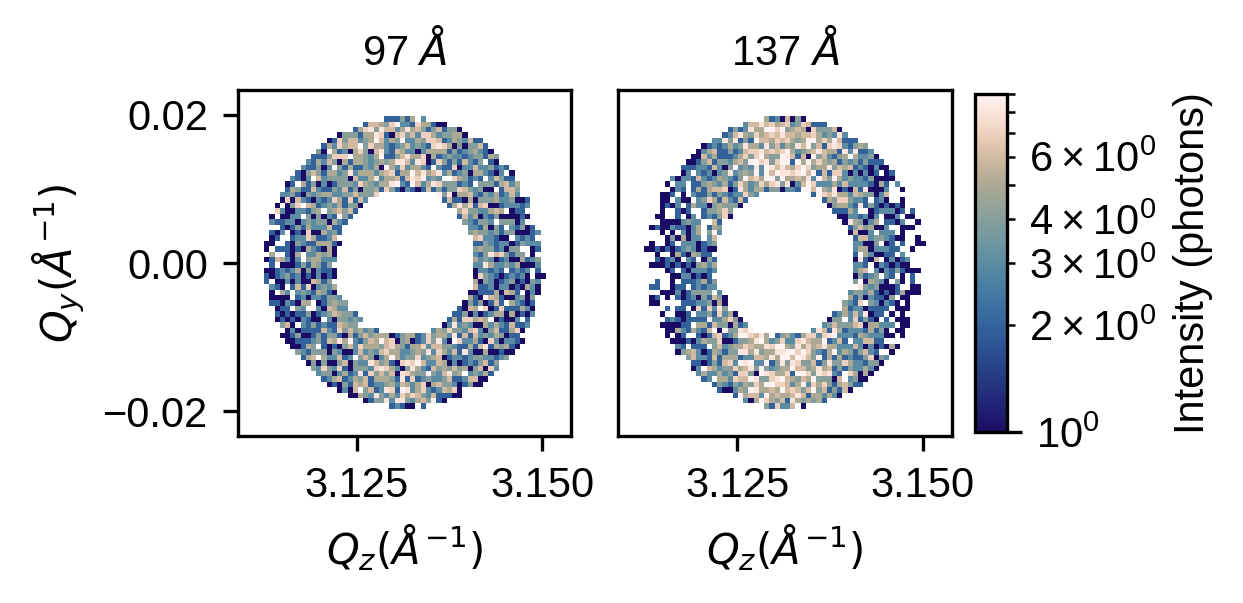

In [17]:
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
f, ax = plt.subplots(figsize=(3.5, 1.5), ncols=2)

vmin = 1
vmax = 9
normalizer = colors.LogNorm(vmin, vmax)
im = cm.ScalarMappable(norm=normalizer, cmap=cmc.lapaz)

ax[0].imshow(t97, interpolation='none', norm=normalizer, cmap=cmc.lapaz, 
             extent=(det_Qz.min(), det_Qz.max(), det_Qy.min(), det_Qy.max()))
ax[0].set_title('97 $\AA$')
ax[0].set_xlabel('$Q_z (\AA^{-1})$')
ax[0].set_ylabel('$Q_y (\AA^{-1})$')

ax[1].imshow(t137, interpolation='none', norm=normalizer, cmap=cmc.lapaz,
             extent=(det_Qz.min(), det_Qz.max(), det_Qy.min(), det_Qy.max()))
ax[1].set_title('137 $\AA$')
ax[1].set_xlabel('$Q_z (\AA^{-1})$')
ax[1].set_yticks([])

f.subplots_adjust(hspace=0, wspace=0, right=0.85)
cbar_ax = f.add_axes([0.85, 0.12, 0.03, 0.75])
f.colorbar(im, cax=cbar_ax, label='Intensity (photons)')

#f.savefig('figs5b.svg', dpi=300, bbox_inches='tight', transparent=True)

In [15]:
# High thickness for demonstration of Laue oscillations in nanobeam diffraction
thick = np.load(os.path.join(data_folder, 'sim_SIO_50nm_range.npy'))

thick[np.isnan(thick)] = 0
thick /= thick.sum(axis=(4, 5), keepdims=True)

avg_max = np.mean(thick.max(axis=(4, 5)))

t300 = thick[0, 10, 10, 10]
t550 = thick[5, 10, 10, 10]
t800 = thick[10, 10, 10, 10]

t300 = (t300 / avg_max) * 10
t550 = (t550 / avg_max) * 10
t800 = (t800 / avg_max) * 10

t300 = rng.poisson(t300)
t550 = rng.poisson(t550)
t800 = rng.poisson(t800)

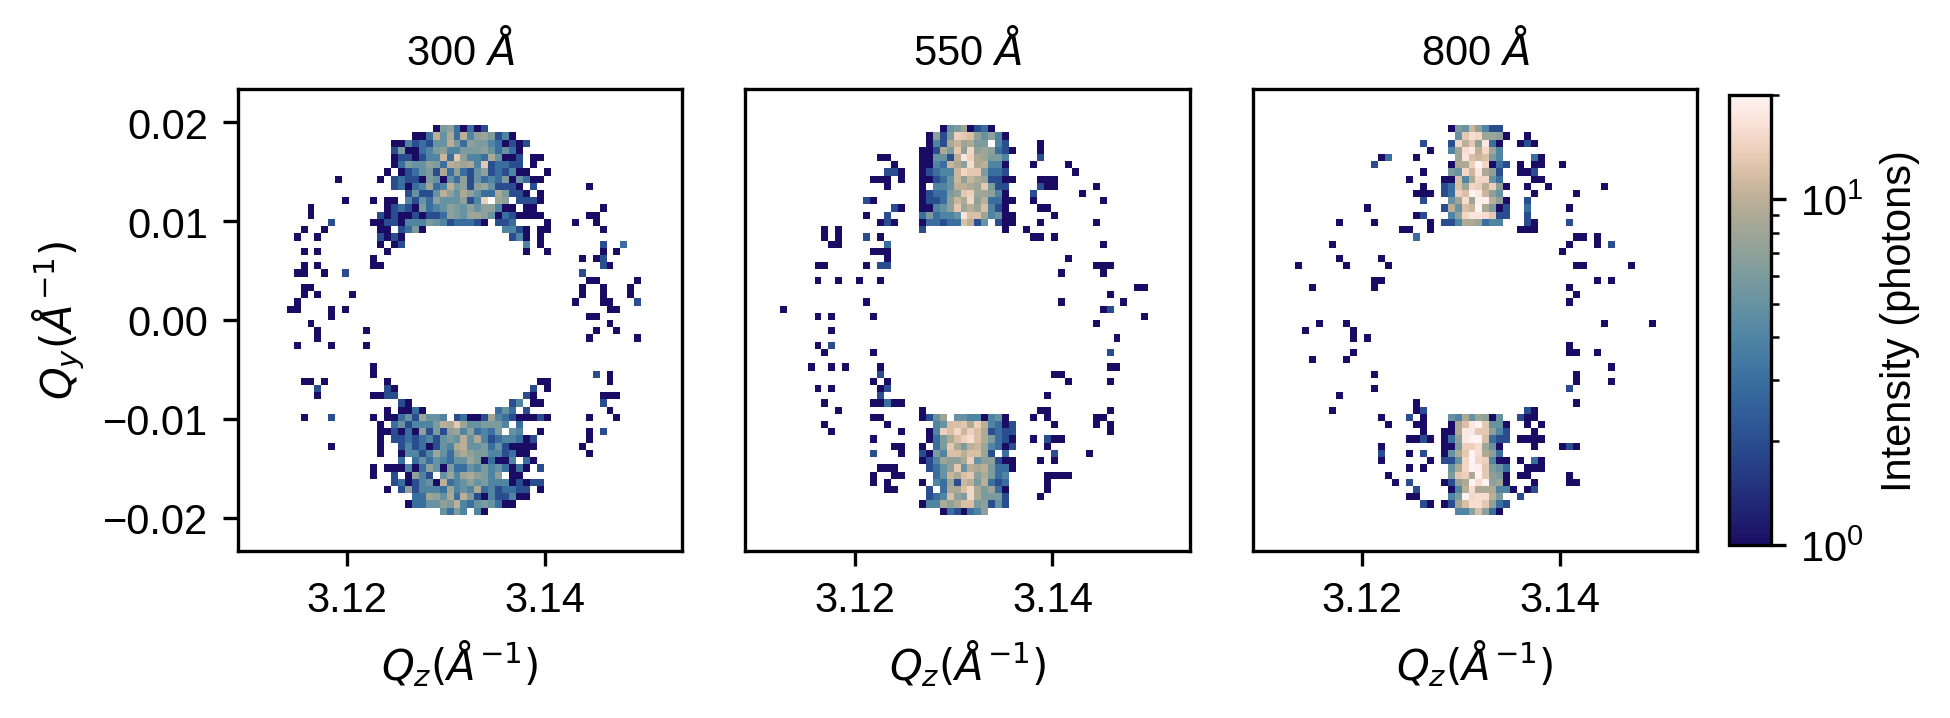

In [28]:
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
f, ax = plt.subplots(figsize=(7, 2), ncols=3)

vmin = 1
vmax = 20
normalizer = colors.LogNorm(vmin, vmax)
im = cm.ScalarMappable(norm=normalizer, cmap=cmc.lapaz)

ax[0].imshow(t300, interpolation='none', norm=normalizer, cmap=cmc.lapaz, 
             extent=(det_Qz.min(), det_Qz.max(), det_Qy.min(), det_Qy.max()))
ax[0].set_title('300 $\AA$')
ax[0].set_xlabel('$Q_z (\AA^{-1})$')
ax[0].set_ylabel('$Q_y (\AA^{-1})$')

ax[1].imshow(t550, interpolation='none', norm=normalizer, cmap=cmc.lapaz,
             extent=(det_Qz.min(), det_Qz.max(), det_Qy.min(), det_Qy.max()))
ax[1].set_title('550 $\AA$')
ax[1].set_xlabel('$Q_z (\AA^{-1})$')
ax[1].set_yticks([])

ax[2].imshow(t800, interpolation='none', norm=normalizer, cmap=cmc.lapaz,
             extent=(det_Qz.min(), det_Qz.max(), det_Qy.min(), det_Qy.max()))
ax[2].set_title('800 $\AA$')
ax[2].set_xlabel('$Q_z (\AA^{-1})$')
ax[2].set_yticks([])

f.subplots_adjust(hspace=0, wspace=0, right=0.85)
cbar_ax = f.add_axes([0.85, 0.12, 0.02, 0.75])
f.colorbar(im, cax=cbar_ax, label='Intensity (photons)')

f.savefig('figs6c.svg', dpi=300, bbox_inches='tight', transparent=True)